**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Aprendizaje Supervisado**

*Edición 2022*

---

### *Grupo N°:* 18

### *Integrantes:*
#### Parada Larrosa, Francisco
#### Peralta, Agustín
####  Porcel, Carolina
####  Quiros, Agustina

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark")

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
#from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/agustinperalta/Diplodatos-g18/main/P4_train.csv')

In [3]:
df_val = pd.read_csv('https://raw.githubusercontent.com/agustinperalta/Diplodatos-g18/main/P4_test.csv')

In [4]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0


### Preprocesado


**Exploración y curación de datos**

1. Vemos si existen registros duplicados

In [5]:
# Cantidad de registros, podemos ver que no hay registros duplicados
df.PassengerId.nunique()

7823

In [6]:
df.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7823.000000,7661.000000,7669.000000,7668.000000,7635.000000,7665.000000,7654.000000,7823.000000
mean,4345.691039,28.879389,226.078237,455.643062,172.600393,305.023222,295.476744,0.506711
std,2504.576803,14.461548,679.180148,1621.290107,597.923749,1133.423579,1093.485752,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2182.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4345.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6515.500000,38.000000,44.000000,69.000000,28.000000,58.000000,46.000000,1.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [7]:
# df_1 = df.copy() 
# for i in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
#   df_1 = df_1[(df_1[i[1]]<df_1[i[1]].quantile(.995)]
# df_1 = df_1.reset_index()



> Datos Nulos



In [8]:
df.isnull().sum()

PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
dtype: int64

Nos quedamos solo con aquellas variables que nos interesan

In [9]:
columns_interested = ['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']

In [10]:
df[columns_interested]

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,0
1,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,1
2,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1
3,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,0
4,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7818,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,1
7819,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,0
7820,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,1
7821,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,0


2. Separamos la variable 'Cabin' para mejor comprensión de los registros

In [11]:
df['deck'] = (np.where(df['Cabin'].str.contains('/'),
                  df['Cabin'].str.split('/').str[0],
                  df['Cabin']))

In [12]:
df['num'] = (np.where(df['Cabin'].str.contains('/'),
                  df['Cabin'].str.split('/').str[1],
                  df['Cabin']))

In [13]:
df['side'] = (np.where(df['Cabin'].str.contains('/'),
                  df['Cabin'].str.split('/').str[2],
                  df['Cabin']))

Dejamos de lado la columna 'num' de la separacion que hicimos de Cabin, dado que tenia un rango muy amplio de valores

In [14]:
columns_interested = ['HomePlanet','CryoSleep','deck','side','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']

In [15]:
df[columns_interested]

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,C,P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,0
1,Mars,True,F,S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,1
2,Europa,True,B,S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1
3,Earth,False,F,P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,0
4,Earth,False,G,P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,Mars,False,F,S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,1
7819,Earth,False,G,S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,0
7820,Mars,True,F,P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,1
7821,Earth,False,E,P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,0


3. Analizamos la correlación entre las variables

In [16]:
df[columns_interested].corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.065941,0.131153,0.034259,0.119490,0.100976,-0.073029
RoomService,0.065941,1.000000,-0.013005,0.058135,0.016298,-0.015428,-0.246508
FoodCourt,0.131153,-0.013005,1.000000,-0.019683,0.213996,0.201737,0.048182
ShoppingMall,0.034259,0.058135,-0.019683,1.000000,0.014820,-0.004502,0.004420
Spa,0.119490,0.016298,0.213996,0.014820,1.000000,0.141536,-0.216280
VRDeck,0.100976,-0.015428,0.201737,-0.004502,0.141536,1.000000,-0.209924
Transported,-0.073029,-0.246508,0.048182,0.004420,-0.216280,-0.209924,1.000000


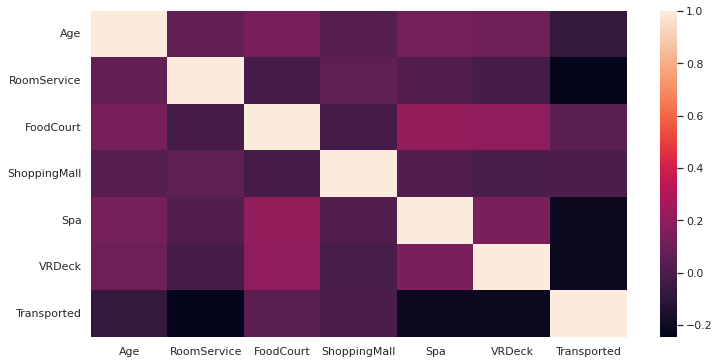

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df[columns_interested].corr(), 
        xticklabels=df[columns_interested].corr().columns,
        yticklabels=df[columns_interested].corr().columns)

Definimos un nuevo dataframe solo con las variables relevantes

In [18]:
df_1 = df[columns_interested]

In [19]:
df_1

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,C,P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,0
1,Mars,True,F,S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,1
2,Europa,True,B,S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1
3,Earth,False,F,P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,0
4,Earth,False,G,P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,Mars,False,F,S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,1
7819,Earth,False,G,S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,0
7820,Mars,True,F,P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,1
7821,Earth,False,E,P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,0


4. Analizamos si existen datos faltantes y si la pérdida es determinística o aleatoria.

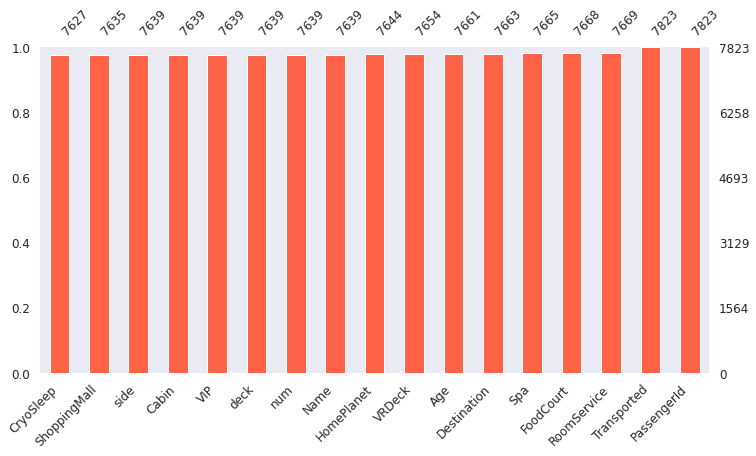

In [20]:
import missingno as msno
msno.bar(df,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato') 

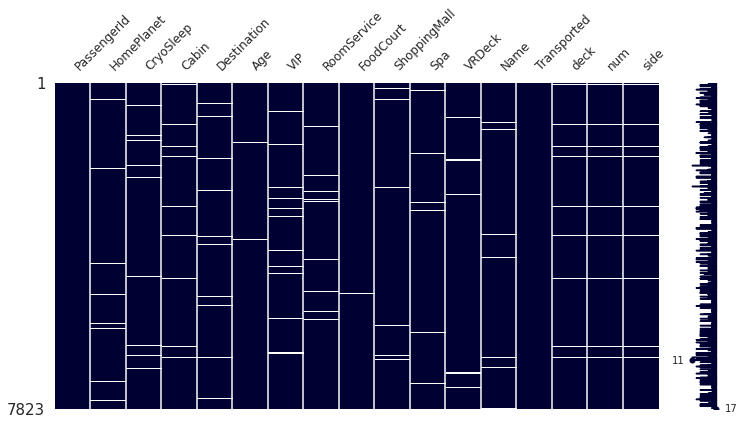

In [21]:
msno.matrix(df,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

Vemos que la pérdida es aleatoria

Exploramos si existen variables con valores nulos

In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7644 non-null   object 
 1   CryoSleep     7627 non-null   object 
 2   deck          7639 non-null   object 
 3   side          7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7661 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7669 non-null   float64
 8   FoodCourt     7668 non-null   float64
 9   ShoppingMall  7635 non-null   float64
 10  Spa           7665 non-null   float64
 11  VRDeck        7654 non-null   float64
 12  Transported   7823 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 794.6+ KB


4a. Para las variables numéricas realizamos imputación por la mediana

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [24]:
imp_num = IterativeImputer(estimator=KNeighborsRegressor(), 
                               initial_strategy='median',
                               max_iter=10, random_state=0)

In [25]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
df_1[imputer_cols] = imp_num.fit_transform(df_1[imputer_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7644 non-null   object 
 1   CryoSleep     7627 non-null   object 
 2   deck          7639 non-null   object 
 3   side          7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7823 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7823 non-null   float64
 8   FoodCourt     7823 non-null   float64
 9   ShoppingMall  7823 non-null   float64
 10  Spa           7823 non-null   float64
 11  VRDeck        7823 non-null   float64
 12  Transported   7823 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 794.6+ KB


4b. Para las variables categóricas hacemos una imputación por KNN

In [27]:
label_cols = ["HomePlanet", "CryoSleep","deck","side","Destination" ,"VIP"]

In [28]:
df_1[label_cols] = df_1[label_cols].apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    ))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [29]:
df_1

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,2.0,0.0,2.0,57.0,0.0,0.0,3859.0,13.0,195.0,3874.0,0
1,2.0,1.0,5.0,1.0,NaN,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,1.0,1.0,1.0,2.0,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,5.0,0.0,2.0,43.0,0.0,142.0,1208.0,0.0,0.0,204.0,0
4,0.0,0.0,6.0,0.0,2.0,19.0,0.0,0.0,0.0,670.0,1.0,34.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,2.0,0.0,5.0,1.0,2.0,12.0,NaN,0.0,0.0,0.0,0.0,0.0,1
7819,0.0,0.0,6.0,1.0,2.0,44.0,0.0,0.0,0.0,744.0,62.0,3.0,0
7820,2.0,1.0,5.0,0.0,2.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7821,0.0,0.0,4.0,0.0,2.0,15.0,0.0,0.0,840.0,123.0,0.0,20.0,0


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [31]:
imp_cat = IterativeImputer(estimator=KNeighborsClassifier(), 
                               initial_strategy='most_frequent',
                               max_iter=10, random_state=0)

In [32]:
# df_1[label_cols] = imp_cat.fit_transform(df_1)

In [33]:
df_1[label_cols] = imp_cat.fit_transform(df_1[label_cols]) # Imputamos variables categoricas en funcion de variables categoricas

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Podemos ver que ya no tenemos variables con valores nulos

In [34]:
df_1.isnull().sum()

HomePlanet      0
CryoSleep       0
deck            0
side            0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [35]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7823 non-null   float64
 1   CryoSleep     7823 non-null   float64
 2   deck          7823 non-null   float64
 3   side          7823 non-null   float64
 4   Destination   7823 non-null   float64
 5   Age           7823 non-null   float64
 6   VIP           7823 non-null   float64
 7   RoomService   7823 non-null   float64
 8   FoodCourt     7823 non-null   float64
 9   ShoppingMall  7823 non-null   float64
 10  Spa           7823 non-null   float64
 11  VRDeck        7823 non-null   float64
 12  Transported   7823 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 794.6 KB


5. Verificamos outliers en las variables

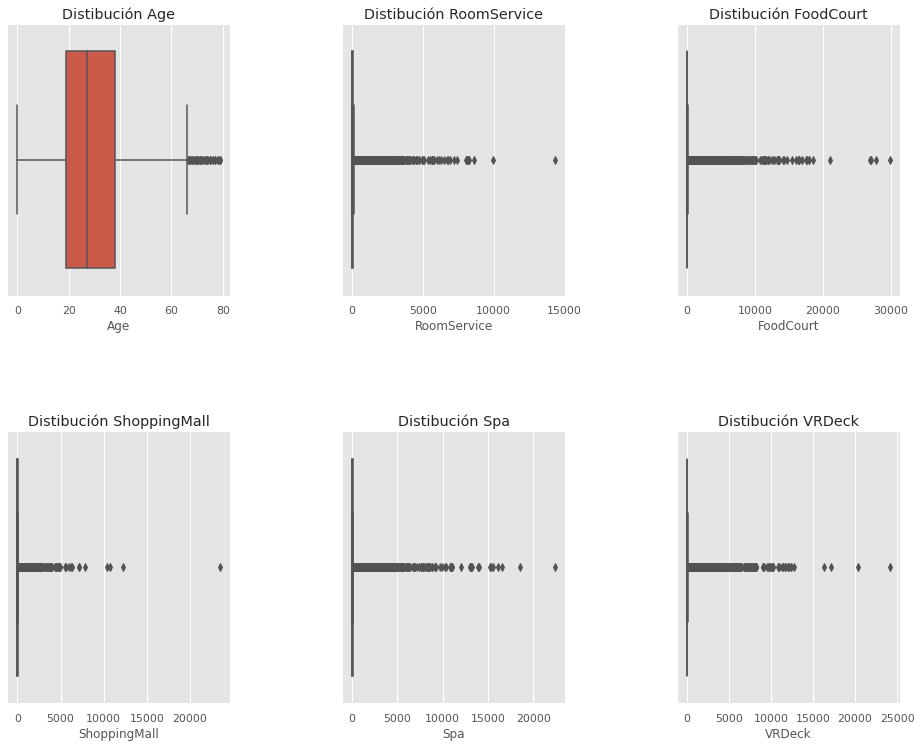

In [36]:
plt.style.use("ggplot")
plt.figure(figsize=(16,20))
for i in enumerate(['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
  plt.subplots_adjust(hspace=.5,wspace=.5)
  ax=plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=df[i[1]]).set_title("Distibución "+str(i[1]))
  

In [37]:
for i in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
  print(i[1])
  print(df[i[1]].quantile([.95,.96,.97,.98,.99,.995]))

RoomService
0.950    1280.60
0.960    1478.84
0.970    1788.68
0.980    2227.20
0.990    3161.76
0.995    4076.50
Name: RoomService, dtype: float64
FoodCourt
0.950     2751.500
0.960     3388.600
0.970     4117.880
0.980     5128.560
0.990     7993.320
0.995    11270.705
Name: FoodCourt, dtype: float64
ShoppingMall
0.950     927.00
0.960    1090.92
0.970    1354.96
0.980    1720.32
0.990    2325.24
0.995    2970.94
Name: ShoppingMall, dtype: float64
Spa
0.950    1545.00
0.960    1888.52
0.970    2579.16
0.980    3642.36
0.990    5248.72
0.995    7932.76
Name: Spa, dtype: float64
VRDeck
0.950    1485.800
0.960    1894.280
0.970    2349.690
0.980    3508.860
0.990    5415.520
0.995    7703.235
Name: VRDeck, dtype: float64


In [38]:
for i in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
  df_1 = df_1[(df_1[i[1]]<df_1[i[1]].quantile(.995))] # sacamos los cuantiles
#df_1 = df_1.reset_index()

Corregimos outliers. Nos quedamos con los valores hasta el cuantil 995 para cada variable. De ese modo perdemos solo el 2,5% de los datos

In [39]:
df_1

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,2.0,0.0,2.0,57.0,0.0,0.0,3859.0,13.0,195.0,3874.0,0
1,2.0,1.0,5.0,1.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,1.0,1.0,1.0,2.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,5.0,0.0,2.0,43.0,0.0,142.0,1208.0,0.0,0.0,204.0,0
4,0.0,0.0,6.0,0.0,2.0,19.0,0.0,0.0,0.0,670.0,1.0,34.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,2.0,0.0,5.0,1.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7819,0.0,0.0,6.0,1.0,2.0,44.0,0.0,0.0,0.0,744.0,62.0,3.0,0
7820,2.0,1.0,5.0,0.0,2.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7821,0.0,0.0,4.0,0.0,2.0,15.0,0.0,0.0,840.0,123.0,0.0,20.0,0


In [40]:
df_1.columns

Index(['HomePlanet', 'CryoSleep', 'deck', 'side', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [41]:
df_1.iloc[:, 0]

0       1.0
1       2.0
2       1.0
3       0.0
4       0.0
       ... 
7818    2.0
7819    0.0
7820    2.0
7821    0.0
7822    1.0
Name: HomePlanet, Length: 7627, dtype: float64

In [42]:
df_1.iloc[:, 1]

0       0.0
1       1.0
2       1.0
3       0.0
4       0.0
       ... 
7818    0.0
7819    0.0
7820    1.0
7821    0.0
7822    1.0
Name: CryoSleep, Length: 7627, dtype: float64

In [43]:
7823 - 7627

196

In [44]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0,C,123,P
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1,F,126,S
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1,B,343,S
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0,F,1420,P
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0,G,9,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1,F,1319,S
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0,G,459,S
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1,F,1772,P
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0,E,253,P


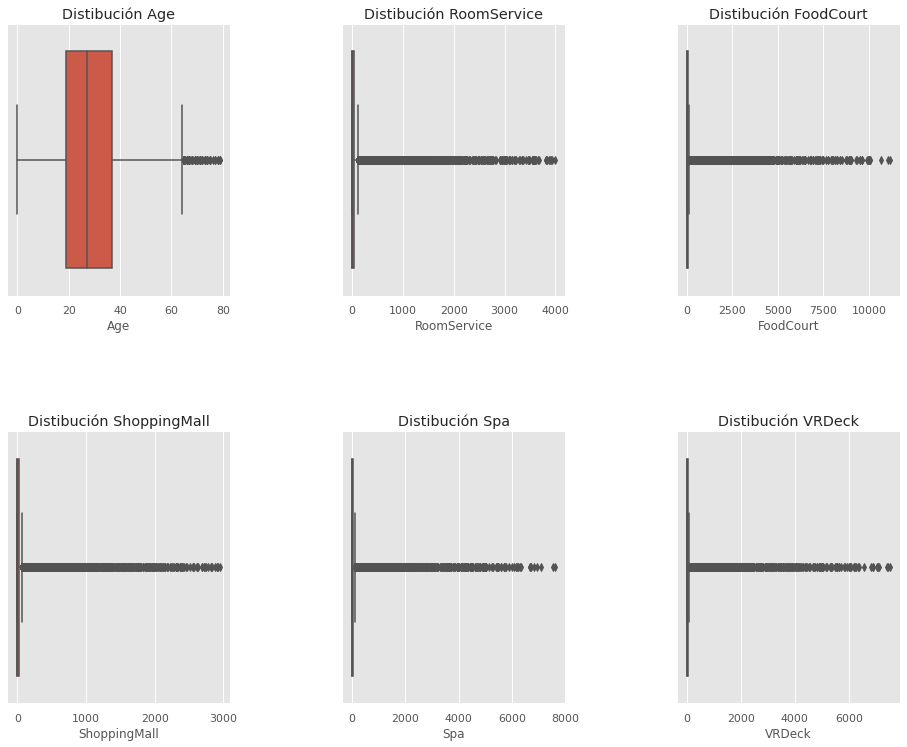

In [45]:
# Volvemos a mirar los outliers luego de la limpieza
plt.style.use("ggplot")
plt.figure(figsize=(16,20))
for i in enumerate(['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
  plt.subplots_adjust(hspace=.5,wspace=.5)
  ax=plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=df_1[i[1]]).set_title("Distibución "+str(i[1]))

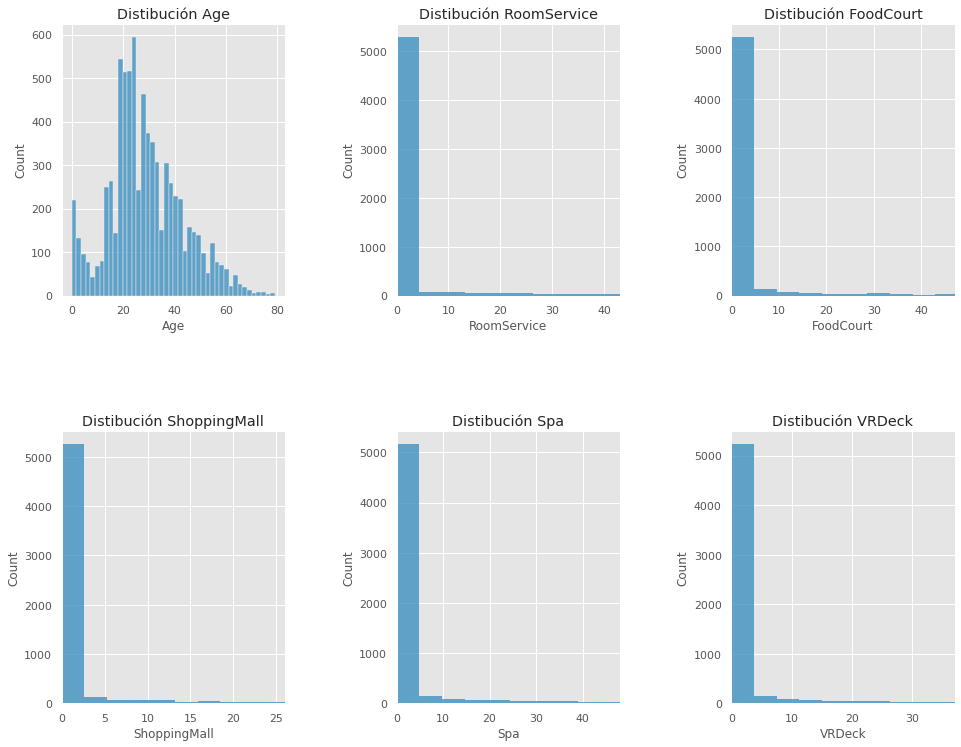

In [46]:
# Volvemos a mirar los outliers luego de la limpieza
plt.style.use("ggplot")
plt.figure(figsize=(16,20))
for i in enumerate(['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
  plt.subplots_adjust(hspace=.5,wspace=.5)
  ax=plt.subplot(3,3,i[0]+1)
  sns.histplot(x=df_1[i[1]]).set_title("Distibución "+str(i[1]))
  if i[1] in (['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
    ax.set_xlim(0, df_1[i[1]].quantile(.75))  

**Desarrollo del modelo**

1. Analizamos primero si las clases están balanceadas, podemos observar que si lo están

In [47]:
# Balance de clases
df_1['Transported'].value_counts()

1    3906
0    3721
Name: Transported, dtype: int64

2. Analizamos la distribución de las variables para luego compararla con la distribución luego de la selección de los datos de train y test.

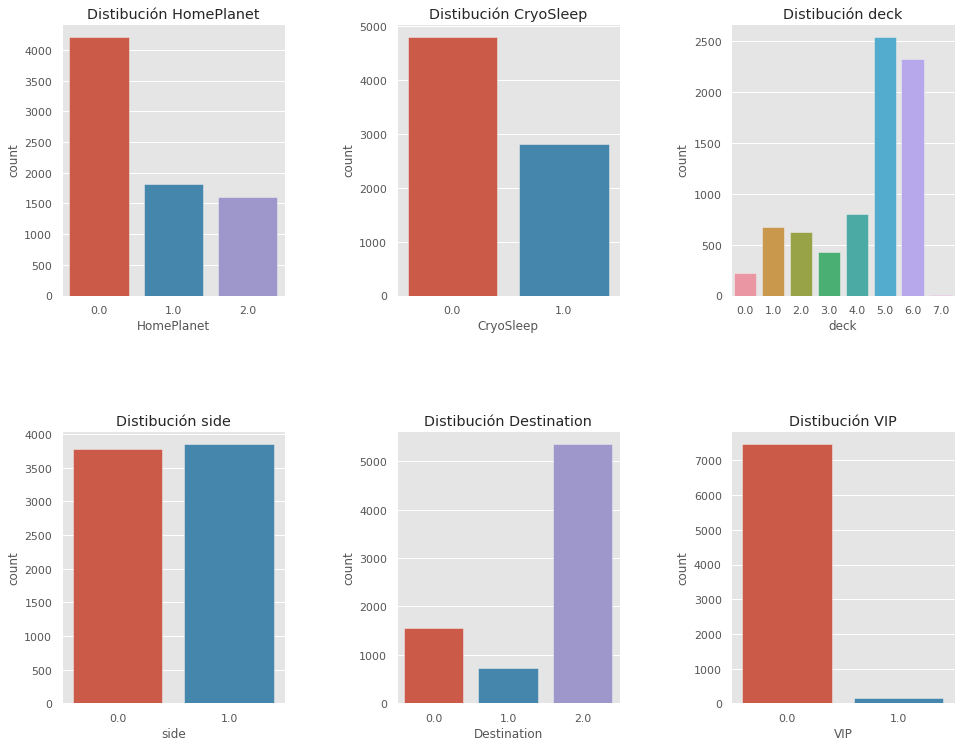

In [48]:
# Distribucion de variables categóricas (las numéricas las vimos en el inciso anterior)
plt.style.use("ggplot")
plt.figure(figsize=(16,20))
for i in enumerate(label_cols):
  plt.subplots_adjust(hspace=.5,wspace=.5)
  ax=plt.subplot(3,3,i[0]+1)
  sns.countplot(x=df_1[i[1]]).set_title("Distibución "+str(i[1]))

In [49]:
df_1 = df_1.reset_index().drop(["index"], axis=1) # reseteamos y dropeamos el indice que se agrega

In [50]:
X = df_1.iloc[:,:12]

In [51]:
X

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,0.0,2.0,0.0,2.0,57.0,0.0,0.0,3859.0,13.0,195.0,3874.0
1,2.0,1.0,5.0,1.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,2.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,5.0,0.0,2.0,43.0,0.0,142.0,1208.0,0.0,0.0,204.0
4,0.0,0.0,6.0,0.0,2.0,19.0,0.0,0.0,0.0,670.0,1.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7622,2.0,0.0,5.0,1.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
7623,0.0,0.0,6.0,1.0,2.0,44.0,0.0,0.0,0.0,744.0,62.0,3.0
7624,2.0,1.0,5.0,0.0,2.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0
7625,0.0,0.0,4.0,0.0,2.0,15.0,0.0,0.0,840.0,123.0,0.0,20.0


In [52]:
y = df_1.iloc[:,12:13] # target

In [53]:
y

,Transported
0,0
1,1
2,1
3,0
4,0
...,...
7622,1
7623,0
7624,1
7625,0


3. Escalamos los datos

In [54]:
from sklearn.preprocessing import MaxAbsScaler

In [55]:
transformer = MaxAbsScaler().fit(X) # no volver a correr con .fit los datos de validacion
X = transformer.transform(X)
X

array([[0.5       , 0.        , 0.28571429, ..., 0.00439783, 0.02556706,
        0.51543374],
       [1.        , 1.        , 0.71428571, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 1.        , 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.71428571, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.57142857, ..., 0.04161028, 0.        ,
        0.00266099],
       [0.5       , 1.        , 0.14285714, ..., 0.        , 0.        ,
        0.        ]])

In [56]:
X = pd.DataFrame(X, columns=df_1.iloc[:,:12].columns)

In [57]:
X

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.5,0.0,0.285714,0.0,1.0,0.721519,0.0,0.000000,0.346006,0.004398,0.025567,0.515434
1,1.0,1.0,0.714286,1.0,1.0,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.5,1.0,0.142857,1.0,1.0,0.417722,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.714286,0.0,1.0,0.544304,0.0,0.035571,0.108312,0.000000,0.000000,0.027142
4,0.0,0.0,0.857143,0.0,1.0,0.240506,0.0,0.000000,0.000000,0.226658,0.000131,0.004524
...,...,...,...,...,...,...,...,...,...,...,...,...
7622,1.0,0.0,0.714286,1.0,1.0,0.151899,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7623,0.0,0.0,0.857143,1.0,1.0,0.556962,0.0,0.000000,0.000000,0.251691,0.008129,0.000399
7624,1.0,1.0,0.714286,0.0,1.0,0.696203,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7625,0.0,0.0,0.571429,0.0,1.0,0.189873,0.0,0.000000,0.075316,0.041610,0.000000,0.002661


4. Separamos los datos para train y test

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

In [59]:
x_train

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
5532,0.0,0.0,0.857143,0.0,1.0,0.354430,0.0,0.000000,0.100870,0.001015,0.073686,0.000931
5902,0.0,0.0,0.857143,0.0,0.0,0.518987,0.0,0.159820,0.000000,0.044993,0.000000,0.032092
776,0.0,0.0,0.857143,1.0,0.5,0.797468,0.0,0.131764,0.000179,0.000000,0.000000,0.000000
6440,0.0,1.0,0.857143,1.0,1.0,0.313924,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6234,0.0,1.0,0.857143,1.0,0.0,0.126582,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2181,0.0,0.0,0.857143,1.0,1.0,0.037975,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2409,0.0,1.0,0.857143,0.0,1.0,0.265823,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2033,0.5,0.0,0.285714,0.0,1.0,0.341772,0.0,0.003758,0.258764,0.000000,0.032647,0.009447
1364,0.5,0.0,0.285714,0.0,0.0,0.291139,0.0,0.000000,0.052363,0.000000,0.002622,0.328499


Comparamos distribucion de X_TRAIN - X_TEST con DF original

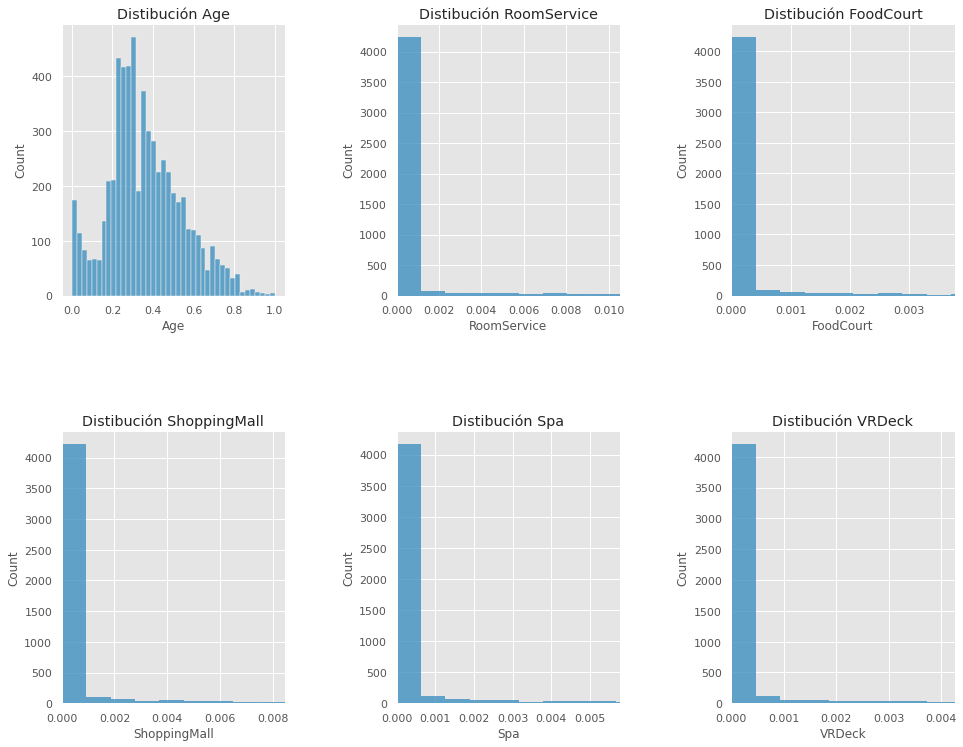

In [60]:
plt.style.use("ggplot")
plt.figure(figsize=(16,20))
for i in enumerate(['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
  plt.subplots_adjust(hspace=.5,wspace=.5)
  ax=plt.subplot(3,3,i[0]+1)
  sns.histplot(x=x_train[i[1]]).set_title("Distibución "+str(i[1]))
  if i[1] in (['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
    ax.set_xlim(0, x_train[i[1]].quantile(.75))  

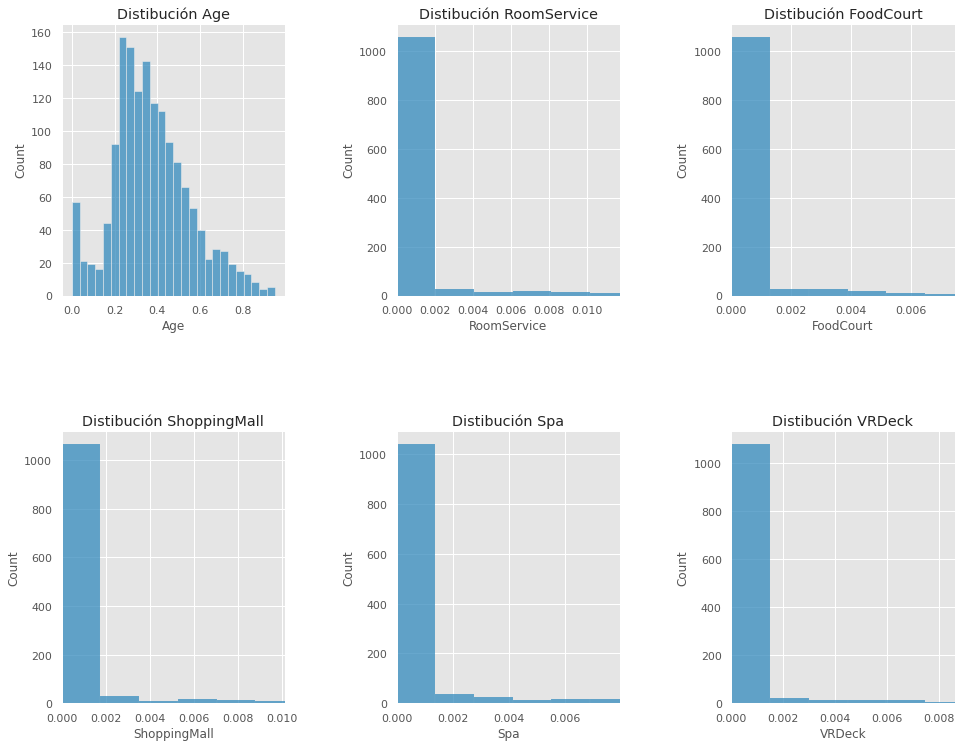

In [61]:
plt.style.use("ggplot")
plt.figure(figsize=(16,20))
for i in enumerate(['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
  plt.subplots_adjust(hspace=.5,wspace=.5)
  ax=plt.subplot(3,3,i[0]+1)
  sns.histplot(x=x_test[i[1]]).set_title("Distibución "+str(i[1]))
  if i[1] in (['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
    ax.set_xlim(0, x_test[i[1]].quantile(.75))  

Comparamos las distribuciones

In [62]:
df_1.describe()

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000,7627.000000
mean,0.657270,0.369739,4.342074,0.504392,1.497312,28.712390,0.021634,195.898623,357.901324,143.790035,235.948813,228.498046,0.512128
std,0.803065,0.482766,1.758443,0.500013,0.810912,14.342909,0.145494,503.095920,1108.723433,374.537476,727.030037,713.903815,0.499886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5.000000,1.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,6.000000,1.000000,2.000000,37.000000,0.000000,43.000000,47.000000,26.000000,48.000000,37.000000,1.000000
max,2.000000,1.000000,7.000000,1.000000,2.000000,79.000000,1.000000,3992.000000,11153.000000,2956.000000,7627.000000,7516.000000,1.000000


Podemos ver que la distribución de ambos grupos responde a la distribución general.

In [63]:
x_train.describe()

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000,6101.000000
mean,0.333224,0.374037,0.621303,0.503032,0.745943,0.361778,0.021144,0.048968,0.032066,0.048202,0.030274,0.029580
std,0.403784,0.483913,0.250809,0.500032,0.407454,0.182118,0.143876,0.126216,0.099979,0.125271,0.093384,0.093266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.428571,0.000000,0.500000,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.714286,1.000000,1.000000,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,1.000000,0.857143,1.000000,1.000000,0.468354,0.000000,0.010521,0.003766,0.008457,0.005769,0.004258
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
x_test.describe()

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000
mean,0.310288,0.352556,0.616270,0.509830,0.759502,0.370123,0.023591,0.049490,0.032186,0.050410,0.033583,0.033688
std,0.391992,0.477922,0.252830,0.500067,0.397317,0.179196,0.151821,0.125304,0.097135,0.132307,0.102702,0.101531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.428571,0.000000,0.500000,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.714286,1.000000,1.000000,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,1.000000,0.857143,1.000000,1.000000,0.468354,0.000000,0.011711,0.007442,0.010149,0.007965,0.008595
max,1.000000,1.000000,0.857143,1.000000,1.000000,0.949367,1.000000,0.905812,0.903165,0.953992,0.991347,0.918175


5. Definimos una función para calcular las métricas



In [65]:
def metricas(a,b):
  print(f'Accuracy:{accuracy_score(a, b):0.2}', '\n'
  f'Presicion:{precision_score(a, b):0.2}', '\n'
  f'Recall:{recall_score(a, b):0.2}', '\n'
  f'F1:{f1_score(a, b):0.2}')

## Primer modelo: DummyClassifier

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

In [67]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=8)
dummy_clf.fit(x_train, y_train)

DummyClassifier(random_state=8, strategy='most_frequent')

In [68]:
y_train_predict = dummy_clf.predict(x_train)

In [69]:
# Return the mean accuracy on the given test data and labels.
dummy_clf.score(y_train, y_train_predict) 
0.75

0.75

In [70]:
confusion_matrix(y_train, y_train_predict)

array([[   0, 2957],
       [   0, 3144]])

In [71]:
metricas(y_train, y_train_predict)

Accuracy:0.52 
Presicion:0.52 
Recall:1.0 
F1:0.68


## Segundo modelo: LogisticRegression

In [72]:
from sklearn.linear_model import SGDClassifier

In [73]:
cl = SGDClassifier(random_state=8)

In [74]:
# Entrenamiento
cl.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=8)

In [75]:
y_train_pred_1 = cl.predict(x_train)

In [76]:
confusion_matrix(y_train, y_train_pred_1)

array([[2561,  396],
       [1059, 2085]])

In [77]:
metricas(y_train, y_train_pred_1)

Accuracy:0.76 
Presicion:0.84 
Recall:0.66 
F1:0.74


## Tercer modelo: DecisionTreeClassifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=8)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=8)

In [79]:
clf.get_depth() # comprobamos cuanta profundidad eligió el clasificador

33

In [80]:
y_train_pred_2 = clf.predict(x_train)

In [81]:
confusion_matrix(y_train, y_train_pred_2)

array([[2771,  186],
       [ 152, 2992]])

In [82]:
metricas(y_train, y_train_pred_2)

Accuracy:0.94 
Presicion:0.94 
Recall:0.95 
F1:0.95


## Los modelos con TEST



> DummyClassifier



In [83]:
y_test_pred =  dummy_clf.predict(x_test)

In [84]:
metricas(y_test, y_test_pred)

Accuracy:0.5 
Presicion:0.5 
Recall:1.0 
F1:0.67




> LogisticRegression



In [85]:
# Log
y_test_pred1 = cl.predict(x_test)

In [86]:
metricas(y_test, y_test_pred1)

Accuracy:0.77 
Presicion:0.85 
Recall:0.65 
F1:0.74




> DecisionTreeClassifier



In [87]:
# Arbol
y_test_pred2 = clf.predict(x_test)

In [88]:
metricas(y_test, y_test_pred2)

Accuracy:0.76 
Presicion:0.75 
Recall:0.77 
F1:0.76


# Mejora de Modelos

## SVM

In [89]:
from sklearn.svm import SVC

In [90]:
clf = SVC(gamma='auto', random_state=8)

In [91]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto', random_state=8)

In [92]:
y_pred_train = clf.predict(x_train)

In [93]:
metricas(y_train,y_pred_train)

Accuracy:0.75 
Presicion:0.82 
Recall:0.67 
F1:0.74


In [94]:
y_pred_test = clf.predict(x_test)

In [95]:
metricas(y_test,y_pred_test)

Accuracy:0.77 
Presicion:0.83 
Recall:0.68 
F1:0.75


El accuracy mejora un poco

### Grid Search SVM

Se comentan estas lineas de código por que tardan varias hs en correr 

In [96]:
# param_grid = {
#     'kernel': ['poly', 'rbf', 'sigmoid'],
#     'degree': [2,3,4,5,6],
#     'max_iter':[10,100,1000,-1],
#     'random_state':[8]
# }

In [97]:
# from sklearn.model_selection import ParameterGrid
# for params in ParameterGrid(param_grid):
#     print(params)
#     model = SVC(**params)

In [98]:
# from sklearn.model_selection import GridSearchCV

# model = SVC(random_state=8)

# cv = GridSearchCV(model, param_grid,scoring='accuracy') # accuracy
# cv.fit(x_train, y_train);

In [99]:
# results = cv.cv_results_
# params = results['params']
# mean_accu = results['mean_test_score']
# std_accu = results['std_test_score']
# rank_accu = results['rank_test_score']

# print("kernel.\tdegree\tmax_iter\trandom_state\t | mean\tstd\trank")
# for p, m_a, s_a, r_a in zip(params, mean_accu,std_accu, rank_accu):
#     print(f"{p['kernel']}\t{p['degree']}\t{p['max_iter']}\t\t{p['random_state']}\t\t | {m_a:0.2f}\t{s_a:0.2f}\t{r_a}")

In [100]:
# best_model_b1 = cv.best_estimator_
# best_model_b1

In [101]:
# best_model_b1.fit(x_train,y_train)

In [102]:
# y_pred_train_b = best_model_b1.predict(x_train)

In [103]:
# metricas(y_train, y_pred_train_b)

In [104]:
# y_pred_test_b = best_model_b1.predict(x_test)

In [105]:
# metricas(y_test,y_pred_test_b)

SVC(degree=2, kernel='poly', random_state=8)

## Red Neuronal

In [106]:
x_train

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
5532,0.0,0.0,0.857143,0.0,1.0,0.354430,0.0,0.000000,0.100870,0.001015,0.073686,0.000931
5902,0.0,0.0,0.857143,0.0,0.0,0.518987,0.0,0.159820,0.000000,0.044993,0.000000,0.032092
776,0.0,0.0,0.857143,1.0,0.5,0.797468,0.0,0.131764,0.000179,0.000000,0.000000,0.000000
6440,0.0,1.0,0.857143,1.0,1.0,0.313924,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6234,0.0,1.0,0.857143,1.0,0.0,0.126582,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2181,0.0,0.0,0.857143,1.0,1.0,0.037975,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2409,0.0,1.0,0.857143,0.0,1.0,0.265823,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2033,0.5,0.0,0.285714,0.0,1.0,0.341772,0.0,0.003758,0.258764,0.000000,0.032647,0.009447
1364,0.5,0.0,0.285714,0.0,0.0,0.291139,0.0,0.000000,0.052363,0.000000,0.002622,0.328499


In [107]:
x_train.shape

(6101, 12)

In [108]:
from sklearn import neural_network

In [109]:
clf = neural_network.MLPClassifier(
    solver='sgd',
    alpha=1e-4, 
    hidden_layer_sizes=(8), # probamos con 1 capa oculta con 8 neuronas
    learning_rate='constant',
    learning_rate_init=0.005,
    batch_size=20,
    random_state=1,
    max_iter=1000,
    verbose=True)

In [110]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.65049509
Iteration 2, loss = 0.56005618
Iteration 3, loss = 0.54182951
Iteration 4, loss = 0.52698187
Iteration 5, loss = 0.51346230
Iteration 6, loss = 0.50296511
Iteration 7, loss = 0.49343398
Iteration 8, loss = 0.48530669
Iteration 9, loss = 0.47872102
Iteration 10, loss = 0.47415325
Iteration 11, loss = 0.47176683
Iteration 12, loss = 0.46822789
Iteration 13, loss = 0.46606312
Iteration 14, loss = 0.46527832
Iteration 15, loss = 0.46267108
Iteration 16, loss = 0.46104299
Iteration 17, loss = 0.46060412
Iteration 18, loss = 0.46023726
Iteration 19, loss = 0.46044293
Iteration 20, loss = 0.45934911
Iteration 21, loss = 0.45879151
Iteration 22, loss = 0.45875901
Iteration 23, loss = 0.45885903
Iteration 24, loss = 0.45739061
Iteration 25, loss = 0.45614532
Iteration 26, loss = 0.45664085
Iteration 27, loss = 0.45703958
Iteration 28, loss = 0.45770460
Iteration 29, loss = 0.45708983
Iteration 30, loss = 0.45711374
Iteration 31, loss = 0.45554726
Iteration 32, los

MLPClassifier(batch_size=20, hidden_layer_sizes=8, learning_rate_init=0.005,
              max_iter=1000, random_state=1, solver='sgd', verbose=True)

In [111]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 20,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 8,
 'learning_rate': 'constant',
 'learning_rate_init': 0.005,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}



*   Train




In [112]:
y_train_pred = clf.predict(x_train)

In [113]:
metricas(y_train, y_train_pred)  

Accuracy:0.79 
Presicion:0.77 
Recall:0.85 
F1:0.81




*   Test



In [114]:
y_test_pred = clf.predict(x_test)

In [115]:
metricas(y_test, y_test_pred)  

Accuracy:0.79 
Presicion:0.76 
Recall:0.85 
F1:0.8






> Con Neural Network mejora la métrica accuracy respecto de SVM





### Grid Search Neural Network

Se comentan estas lineas de código por que tardan varias hs en correr 

In [116]:
# param_grid={
# 'learning_rate': ["constant", "invscaling", "adaptive"],
# 'hidden_layer_sizes': [(8,4), (4,4), (8,2),(8,4,2),(10,8,4),(30,20,15),(30,10,15,4),(30,25,20),(20,10,5)],
# 'alpha': 10.0 ** -np.arange(1, 7),
# 'activation': ["logistic", "relu", "Tanh"],
# "max_iter":[5000]
# }


In [117]:
# from sklearn.model_selection import ParameterGrid
# for params in ParameterGrid(param_grid):
#     print(params)
#     model = neural_network.MLPClassifier(**params)

In [118]:
# from sklearn.model_selection import GridSearchCV

# model = neural_network.MLPClassifier(random_state=8)

# cv = GridSearchCV(model, param_grid,scoring='accuracy') # accuracy
# cv.fit(x_train, y_train);

# 3 Mejores Modelos 

## Random Forest: Best Model

In [119]:
from sklearn import ensemble

In [120]:
clf = ensemble.RandomForestClassifier(n_estimators=100, random_state=2,criterion="gini")
clf.fit(x_train, y_train);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  




*   Train



In [121]:
y_train_pred = clf.predict(x_train)

In [122]:
metricas(y_train,y_train_pred)

Accuracy:0.94 
Presicion:0.93 
Recall:0.97 
F1:0.95




*   Test






In [123]:
y_test_pred = clf.predict(x_test)

In [124]:
confusion_matrix(y_test,y_test_pred)

array([[631, 133],
       [156, 606]])

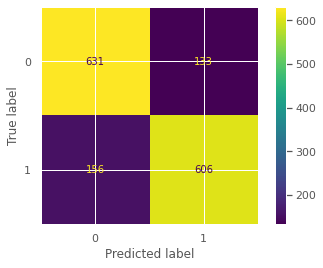

In [125]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
plt.show()

In [126]:
metricas(y_test,y_test_pred)

Accuracy:0.81 
Presicion:0.82 
Recall:0.8 
F1:0.81


Este es el modelo que nos permitió conseguir la mejor accuracy

##Neural Network: Best Model 

Elegimos `3 capas ocultas` :

*  1er capa - 20 neuronas
*  2da capa - 10 neuronas
*  3er capa - 5 neuronas

In [127]:
best_model_nn = neural_network.MLPClassifier(alpha=0.001, hidden_layer_sizes=(20, 10, 5), max_iter=5000,random_state=8)
best_model_nn

MLPClassifier(alpha=0.001, hidden_layer_sizes=(20, 10, 5), max_iter=5000,
              random_state=8)

In [128]:
best_model_nn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(20, 10, 5), max_iter=5000,
              random_state=8)

In [129]:
# Pérdida mínima alcanzada durante el ajuste
best_model_nn.best_loss_

0.41123254144857957

In [130]:
# Vemos cuál es la función de activación de salida
best_model_nn.out_activation_

'logistic'



*   Train



In [131]:
y_pred_train_nn = best_model_nn.predict(x_train)

In [132]:
metricas(y_train, y_pred_train_nn)

Accuracy:0.81 
Presicion:0.82 
Recall:0.81 
F1:0.81






*   Test





In [133]:
y_pred_test_nn = best_model_nn.predict(x_test)

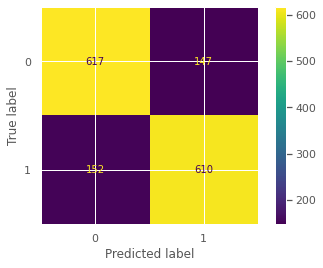

In [134]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_nn)
plt.show()

In [135]:
metricas(y_test,y_pred_test_nn)

Accuracy:0.8 
Presicion:0.81 
Recall:0.8 
F1:0.8


##Boosting: Best Model

In [136]:
from xgboost import XGBRFClassifier

Se comentan estas lineas de código por que tardan varias hs en correr 

In [137]:
# param_grid = {
#     'objetive': ['binary:logitraw', 'binary:hinge', 'binary:logistic'],
#     'colsample_bytree': [ 0.3,0.4,0.5],
#     'learning_rate':[0.1,0.2,0.3,0.08],
#     'max_depth':[15,20,25,30,35,40,45],
#     'alpha' : [5,10,15,20],
#     'n_estimators':[20,25,30,35,40,45],
#     'lambda':[5,10,15,20]
# }

In [138]:
# from sklearn.model_selection import ParameterGrid
# for params in ParameterGrid(param_grid):
#     print(params)
#     model = XGBRFClassifier(**params)

In [139]:
# from sklearn.model_selection import GridSearchCV

# model = XGBRFClassifier(random_state=8)

# cv = GridSearchCV(model, param_grid,scoring='accuracy') # accuracy
# cv.fit(x_train, y_train);

In [140]:
best_model_b1 = XGBRFClassifier(alpha=5, colsample_bytree=0.5, reg_lambda=5, learning_rate=0.1,
                max_depth=20, n_estimators=30, objetive='binary:logitraw',
                random_state=8)
best_model_b1

XGBRFClassifier(alpha=5, colsample_bytree=0.5, learning_rate=0.1, max_depth=20,
                n_estimators=30, objetive='binary:logitraw', random_state=8,
                reg_lambda=5)

In [141]:
best_model_b1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBRFClassifier(alpha=5, colsample_bytree=0.5, learning_rate=0.1, max_depth=20,
                n_estimators=30, objetive='binary:logitraw', random_state=8,
                reg_lambda=5)



*   Train



In [142]:
y_pred_train_b = best_model_b1.predict(x_train)

In [143]:
metricas(y_train, y_pred_train_b)

Accuracy:0.8 
Presicion:0.81 
Recall:0.81 
F1:0.81






*   Test





In [144]:
y_pred_test_b = best_model_b1.predict(x_test)

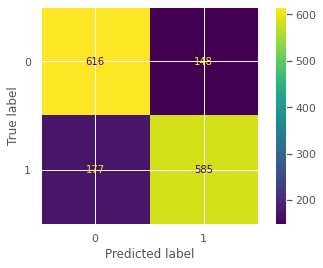

In [145]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_b)
plt.show()

In [146]:
metricas(y_test,y_pred_test_b)

Accuracy:0.79 
Presicion:0.8 
Recall:0.77 
F1:0.78


No es mejor que el máximo obtenido con anterioridad

#VALIDACION

Sometemos al conjunto de validación a los mismos procesos que al conjunto de datos de train y test:

1. Separamos la variable 'Cabin', dejando de lado la variable 'num'
2. Para los dateos faltantes realizamos imputaciones
3. Escalamos los datos

Aclaración: No analizamos outliers dado que no es correcto eliminar datos de este conjunto para el cúal ya se tiene definido un accuracy a superar.

In [147]:
df_val.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [148]:
x_val = df_val

In [149]:
x_val['deck'] = (np.where(x_val['Cabin'].str.contains('/'),
                  x_val['Cabin'].str.split('/').str[0],
                  x_val['Cabin']))

In [150]:
x_val['num'] = (np.where(x_val['Cabin'].str.contains('/'),
                  x_val['Cabin'].str.split('/').str[1],
                  x_val['Cabin']))

In [151]:
x_val['side'] = (np.where(x_val['Cabin'].str.contains('/'),
                  x_val['Cabin'].str.split('/').str[2],
                  x_val['Cabin']))

In [152]:
x_test

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
5808,0.5,0.0,0.285714,0.0,1.0,0.544304,0.0,0.001002,0.099614,0.039919,0.242822,0.074454
99,0.5,1.0,0.142857,1.0,1.0,0.316456,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3605,0.0,1.0,0.857143,0.0,1.0,0.430380,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4645,0.0,0.0,0.714286,0.0,1.0,0.291139,0.0,0.270792,0.000000,0.000000,0.000000,0.000931
1615,1.0,0.0,0.714286,0.0,1.0,0.329114,1.0,0.468186,0.000000,0.046008,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
6697,0.5,0.0,0.428571,0.0,1.0,0.329114,0.0,0.000000,0.342329,0.000000,0.246099,0.018095
4461,0.0,0.0,0.714286,1.0,1.0,0.177215,0.0,0.372996,0.000179,0.042625,0.060312,0.009580
6674,1.0,0.0,0.714286,0.0,1.0,0.405063,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1384,0.5,0.0,0.142857,0.0,0.0,0.734177,1.0,0.000501,0.346275,0.000000,0.194310,0.009713


In [153]:
x_val = x_val.drop('Cabin',axis=1)

In [154]:
x_val

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,deck,num,side
0,415,Europa,True,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty,NaN,NaN,NaN
1,8663,Earth,True,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock,G,1489,S
2,4524,Earth,False,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley,G,776,P
3,8246,Earth,False,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods,E,577,S
4,2935,Europa,False,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive,B,117,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta,F,1212,S
866,5478,Earth,True,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey,G,947,S
867,6760,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson,G,1148,P
868,1437,Earth,False,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley,F,293,S


In [155]:
columns_interested_val = ['HomePlanet','CryoSleep','deck','side','Destination','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [156]:
x_val=x_val[columns_interested_val]

In [157]:
x_val

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,True,NaN,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,True,G,S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0
2,Earth,False,G,P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0
3,Earth,False,E,S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0
4,Europa,False,B,S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
865,Mars,False,F,S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0
866,Earth,True,G,S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0
867,Earth,True,G,P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
868,Earth,False,F,S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0


In [158]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
x_val[imputer_cols] = imp_num.fit_transform(x_val[imputer_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [159]:
label_cols = ["HomePlanet", "CryoSleep","deck","side","Destination" ,"VIP"]

In [160]:
x_val[label_cols] = x_val[label_cols].apply(lambda series: pd.Series(
        LabelEncoder().fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    ))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [161]:
x_val

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,1.0,NaN,NaN,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,6.0,1.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.0,0.0,2.0,44.0,0.0,22.0,1.0,0.0,864.0,0.0
3,0.0,0.0,4.0,1.0,1.0,63.0,0.0,0.0,0.0,80.0,0.0,2322.0
4,1.0,0.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
865,2.0,0.0,5.0,1.0,2.0,54.0,0.0,676.0,0.0,231.0,379.0,0.0
866,0.0,1.0,6.0,1.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0
867,0.0,1.0,6.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
868,0.0,0.0,5.0,1.0,2.0,18.0,0.0,765.0,0.0,13.0,0.0,0.0


In [162]:
x_val[label_cols] = imp_cat.fit_transform(x_val[label_cols]) # Imputamos variables categoricas en funcion de variables categoricas

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [163]:
x_val

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,1.0,1.0,1.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,6.0,1.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.0,0.0,2.0,44.0,0.0,22.0,1.0,0.0,864.0,0.0
3,0.0,0.0,4.0,1.0,1.0,63.0,0.0,0.0,0.0,80.0,0.0,2322.0
4,1.0,0.0,1.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
865,2.0,0.0,5.0,1.0,2.0,54.0,0.0,676.0,0.0,231.0,379.0,0.0
866,0.0,1.0,6.0,1.0,2.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0
867,0.0,1.0,6.0,0.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
868,0.0,0.0,5.0,1.0,2.0,18.0,0.0,765.0,0.0,13.0,0.0,0.0


In [164]:
columns_val = x_val.columns

In [165]:
transformer = MaxAbsScaler().fit(x_val)
x_val = transformer.transform(x_val)
x_val

array([[0.5       , 1.        , 0.14285714, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.85714286, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.85714286, ..., 0.        , 0.05771543,
        0.        ],
       ...,
       [0.        , 1.        , 0.85714286, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.71428571, ..., 0.0014352 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.71428571, ..., 0.        , 0.04696059,
        0.        ]])

In [166]:
x_val = pd.DataFrame(x_val,columns=columns_val)

In [167]:
x_val

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.5,1.0,0.142857,1.0,0.0,0.459459,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.0,0.857143,1.0,0.5,0.175676,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.857143,0.0,1.0,0.594595,0.0,0.003736,0.000057,0.000000,0.057715,0.000000
3,0.0,0.0,0.571429,1.0,0.5,0.851351,0.0,0.000000,0.000000,0.008832,0.000000,0.134173
4,0.5,0.0,0.142857,1.0,0.0,0.135135,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
865,1.0,0.0,0.714286,1.0,1.0,0.729730,0.0,0.114810,0.000000,0.025502,0.025317,0.000000
866,0.0,1.0,0.857143,1.0,1.0,0.783784,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
867,0.0,1.0,0.857143,0.0,0.5,0.243243,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
868,0.0,0.0,0.714286,1.0,1.0,0.243243,0.0,0.129925,0.000000,0.001435,0.000000,0.000000


##Validacion con neural network

In [168]:
nn = neural_network.MLPClassifier(alpha=0.001, hidden_layer_sizes=(20, 10, 5), max_iter=5000,random_state=8)

In [169]:
nn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(20, 10, 5), max_iter=5000,
              random_state=8)

In [170]:
x_train

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
5532,0.0,0.0,0.857143,0.0,1.0,0.354430,0.0,0.000000,0.100870,0.001015,0.073686,0.000931
5902,0.0,0.0,0.857143,0.0,0.0,0.518987,0.0,0.159820,0.000000,0.044993,0.000000,0.032092
776,0.0,0.0,0.857143,1.0,0.5,0.797468,0.0,0.131764,0.000179,0.000000,0.000000,0.000000
6440,0.0,1.0,0.857143,1.0,1.0,0.313924,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
6234,0.0,1.0,0.857143,1.0,0.0,0.126582,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2181,0.0,0.0,0.857143,1.0,1.0,0.037975,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2409,0.0,1.0,0.857143,0.0,1.0,0.265823,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2033,0.5,0.0,0.285714,0.0,1.0,0.341772,0.0,0.003758,0.258764,0.000000,0.032647,0.009447
1364,0.5,0.0,0.285714,0.0,0.0,0.291139,0.0,0.000000,0.052363,0.000000,0.002622,0.328499


In [171]:
x_val

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.5,1.0,0.142857,1.0,0.0,0.459459,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.0,0.857143,1.0,0.5,0.175676,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.857143,0.0,1.0,0.594595,0.0,0.003736,0.000057,0.000000,0.057715,0.000000
3,0.0,0.0,0.571429,1.0,0.5,0.851351,0.0,0.000000,0.000000,0.008832,0.000000,0.134173
4,0.5,0.0,0.142857,1.0,0.0,0.135135,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
865,1.0,0.0,0.714286,1.0,1.0,0.729730,0.0,0.114810,0.000000,0.025502,0.025317,0.000000
866,0.0,1.0,0.857143,1.0,1.0,0.783784,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
867,0.0,1.0,0.857143,0.0,0.5,0.243243,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
868,0.0,0.0,0.714286,1.0,1.0,0.243243,0.0,0.129925,0.000000,0.001435,0.000000,0.000000


In [172]:
y_val_pred_nn = nn.predict(x_val)

In [173]:
df_val_predict = pd.DataFrame(y_val_pred_nn,columns=['Transported'])

In [174]:
df_val_predict

,Transported
0,1
1,1
2,0
3,0
4,1
...,...
865,0
866,1
867,1
868,0


In [175]:
df_val['PassengerId'].astype({'PassengerId':str})

0       415
1      8663
2      4524
3      8246
4      2935
       ... 
865    5996
866    5478
867    6760
868    1437
869    5171
Name: PassengerId, Length: 870, dtype: object

In [176]:
sample_submission = pd.merge(df_val['PassengerId'].astype({'PassengerId':str}),df_val_predict, left_index=True, right_index=True)

In [177]:
sample_submission

,PassengerId,Transported
0,415,1
1,8663,1
2,4524,0
3,8246,0
4,2935,1
...,...,...
865,5996,0
866,5478,1
867,6760,1
868,1437,0


In [178]:
sample_submission.to_csv(r'/content/sample_data/sample_submission.csv', index = False)

##Validacion Boosting

In [179]:
from xgboost import XGBRFClassifier

In [180]:
clf= XGBRFClassifier(alpha=5,reg_lambda=5, colsample_bytree=0.5, learning_rate=0.1,max_depth=20, n_estimators=30, objetive='binary:logitraw',random_state=8)

In [181]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBRFClassifier(alpha=5, colsample_bytree=0.5, learning_rate=0.1, max_depth=20,
                n_estimators=30, objetive='binary:logitraw', random_state=8,
                reg_lambda=5)

In [182]:
y_val_pred = clf.predict(x_val)

In [183]:
df_val_predict = pd.DataFrame(y_val_pred,columns=['Transported'])

In [184]:
df_val_predict

,Transported
0,1
1,1
2,0
3,0
4,1
...,...
865,0
866,1
867,1
868,0


In [185]:
df_val['PassengerId'].astype({'PassengerId':str})

0       415
1      8663
2      4524
3      8246
4      2935
       ... 
865    5996
866    5478
867    6760
868    1437
869    5171
Name: PassengerId, Length: 870, dtype: object

In [186]:
sample_submission = pd.merge(df_val['PassengerId'].astype({'PassengerId':str}),df_val_predict, left_index=True, right_index=True)

In [187]:
sample_submission

,PassengerId,Transported
0,415,1
1,8663,1
2,4524,0
3,8246,0
4,2935,1
...,...,...
865,5996,0
866,5478,1
867,6760,1
868,1437,0


In [188]:
sample_submission.to_csv(r'/content/sample_data/sample_submission.csv', index = False)

##Validacion con Random Forest

In [189]:
x_val

,HomePlanet,CryoSleep,deck,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.5,1.0,0.142857,1.0,0.0,0.459459,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.0,0.857143,1.0,0.5,0.175676,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.857143,0.0,1.0,0.594595,0.0,0.003736,0.000057,0.000000,0.057715,0.000000
3,0.0,0.0,0.571429,1.0,0.5,0.851351,0.0,0.000000,0.000000,0.008832,0.000000,0.134173
4,0.5,0.0,0.142857,1.0,0.0,0.135135,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
865,1.0,0.0,0.714286,1.0,1.0,0.729730,0.0,0.114810,0.000000,0.025502,0.025317,0.000000
866,0.0,1.0,0.857143,1.0,1.0,0.783784,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
867,0.0,1.0,0.857143,0.0,0.5,0.243243,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
868,0.0,0.0,0.714286,1.0,1.0,0.243243,0.0,0.129925,0.000000,0.001435,0.000000,0.000000


In [190]:
y_val_pred_clf = clf.predict(x_val)

In [191]:
df_val_predict = pd.DataFrame(y_val_pred_clf,columns=['Transported'])

In [192]:
df_val_predict

,Transported
0,1
1,1
2,0
3,0
4,1
...,...
865,0
866,1
867,1
868,0


In [193]:
sample_submission = pd.merge(df_val['PassengerId'].astype({'PassengerId':str}),df_val_predict, left_index=True, right_index=True)

In [194]:
sample_submission

,PassengerId,Transported
0,415,1
1,8663,1
2,4524,0
3,8246,0
4,2935,1
...,...,...
865,5996,0
866,5478,1
867,6760,1
868,1437,0


In [195]:
sample_submission.to_csv(r'/content/sample_data/sample_submission.csv', index = False)

In [196]:
y_val_boos = best_model_b1.predict(x_val)

Además de lo que figura en esta notebook, se intentó también:
1. Resumir todas las variables monetarias en una sola que nos indique el total de lo gastado por cada pasajero, y así ingresar menor cantidad de variables para cada modelo.
2. Cambiar la imputación de las variables numéricas que realizamos. En lugar de realizarlo por la mediana, hacerlo mediante KNN.
3. Estandarizar los datos mediante un proceso de logaritmo natural.
4. Cambiar iteraciones para los casos de redes

Ninguno de estos prodecimientos logró mejorar el accuracy obtenido en el modelo de Random Forest de 0,81 detallado más arriba.